# Countour 2D plot of experimental data set

There is set of experimental data files: 

- S-curve168.txt 
- ...
- S-curve468.txt.

Each file corresponds to the specific magnetic field applied during the measurement (fields set: 7 - 10 mT, step 0.01 mT).

File contains 2 columns: changing parameter (level) and response of the sample (critical current).

__2D map: X: level, Y: magnetic field, Z: current__

In [14]:
# %matplotlib qt
%matplotlib inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# generate filenames
files = np.arange(168,468,1)
len(files)

300

In [17]:
levels = []
currents = []

for file in files:
    
    path='S-curves/S-curve'+str(file)+'.txt'
    
    with open(path, 'r') as f:
        rawdata = np.array([float(i) for i in f.read().split()], dtype=np.float64)
        levels.append(rawdata[0::2])
        currents.append(rawdata[1::2])
        
levels_np = np.array(levels)
currents_np = np.array(currents)*15  # 15 - conversion factor. I(uA) = rawdata(V) * 15(uA/V)

In [18]:
currents_np.shape

(300, 101)

In [19]:
#fields set
fields = np.linspace(7,10,300)

In [20]:
#Building 2D array of fields for plot
fields2D = []
for i in range(101):
    fields2D.append(fields)
fields2D = np.transpose(fields2D)

In [21]:
fields2D.shape

(300, 101)

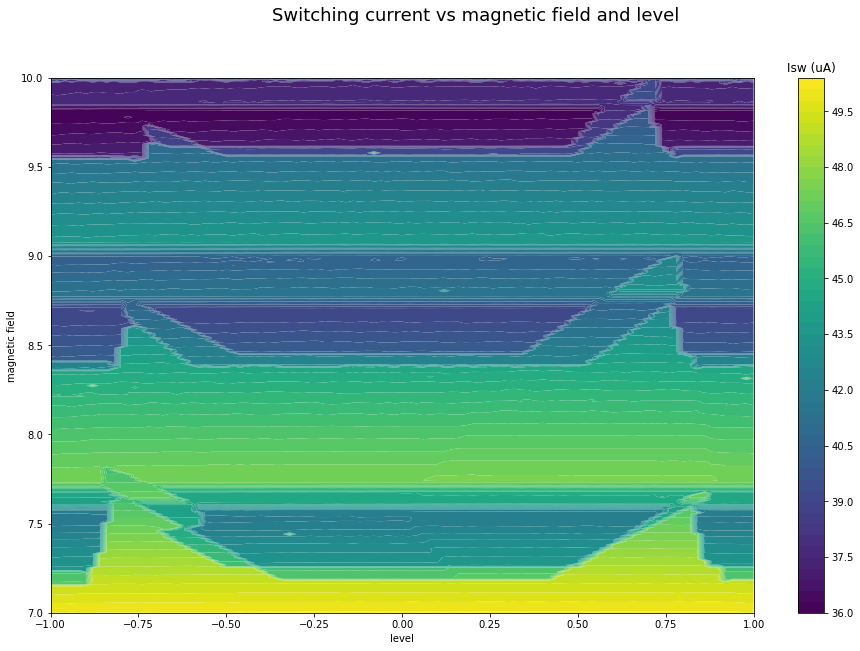

In [22]:
plt.figure(0)
pic1 = plt.contourf(levels_np, fields2D, currents_np, 50, cmap = 'viridis', antialiased=True)
plt.xlabel('level')
plt.ylabel('magnetic field')
figsize = (40/2.54,25/2.54) # in inches
plt.suptitle('Switching current vs magnetic field and level', fontsize=18)
plt.colorbar().ax.set_title('Isw (uA)')
plt.figure(0).set_size_inches(figsize)
plt.show()